# reading

[SAUCIE, Sparse Autoencoder for Clustering Imputation and Embedding 2019, Nature Methods]

# Autoencoder application

- dimensionality reduction

- denoising

- information retrieval

- anomaly detection

- data compression

# vanilla Autoencoder

- Autoencoder is a neural network trained to **approximately copy** its input x to its output

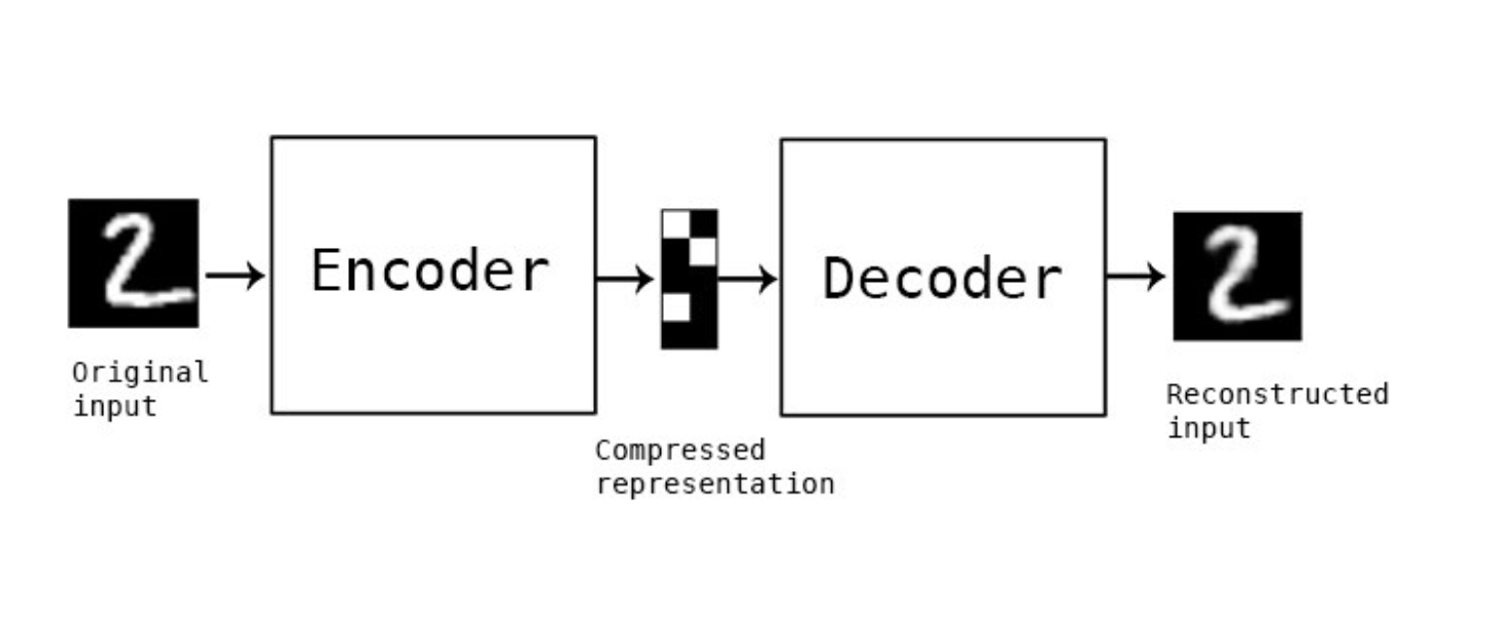

## architecture

- 2 parts

    - encoder: $z = f(x)$: input layer > hidden layers > code layer
    
    - decoder: $x'=g(z)$: code layer > hidden layers > output layer


- code layer/**informational bottleneck**/embedding layer: learn an embedding of data $z$

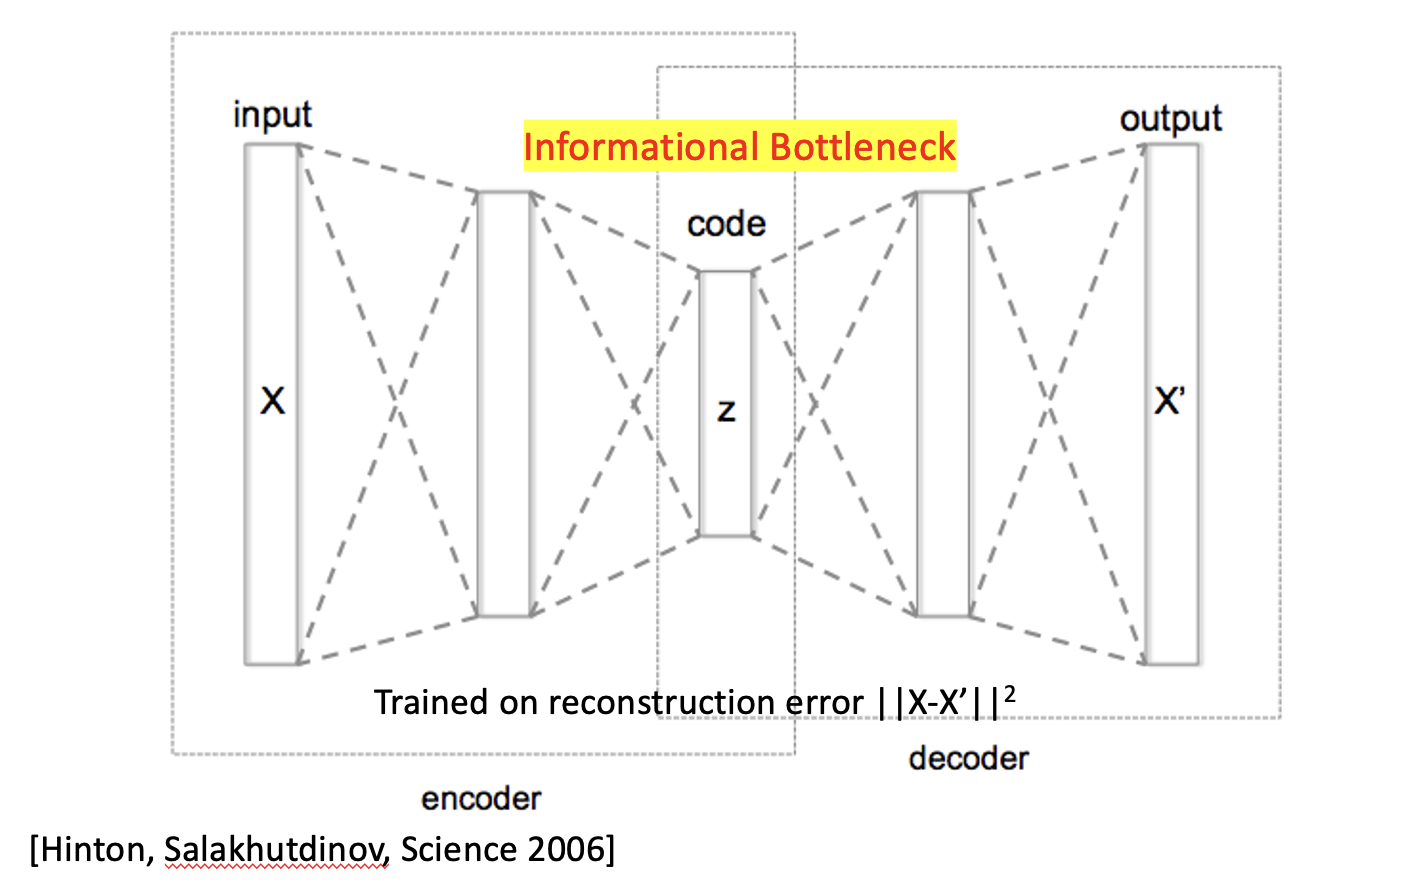

## loss: reconstruction error

- objective: minimize reconstruction error between input and reconstructed input

$$
L = L(x, \hat x)= L(x, g(f(x)))
$$

- reconstruction error along encourages **identity**

- a kind of **self-supervised** loss

## high capacity problem

- high capacity problem: if the dim of code layer >= input layer, Autoencoder can just learn **identity** by copy the input to be output without extracting useful embeddings

- solution: 

    - architecture constraint: dim of code layer is much smaller than input layer
    
    - regularization: add **penalty** to loss function

## info bottleneck theory

a good neural network embedding in a hidden layer:

- Mutual information between hidden states and outputs is relatively high. 

- Mutual information between input and hidden states should be relatively low. hidden states get rid of useless info in input.

# undercomplete Autoencoder

- undercomplete Autoencoder: dimension of code layer < input layer, e.g., 2, 3

- similar to some dim reduction methods, force Autoencoder to capture the most salient features of training data

- subspace of PCA = subspace of Autoencoder with linear encoder + linear decoder + MSE loss

    Embeddings Not exactly same but span the same subspace

    $$
    L = ||X-W^TWX||^2
    $$

- embedding like kernel PCA: nonlinear encoder and non-linear decoder

# regularized Autoencoder

$$
J = L(x, \hat x) + \Omega(z)
$$

- regularized Autoencoder add **regularization term** to the loss function to overcome the capacity problem and encourage desirable properties (sparsity, robust to noise, restrictions on gradient sensiticity)

- regularization **plays against reconstruction**, so model can learn meaningful embeddings while maintain high quality reconstruction

## MAP inference

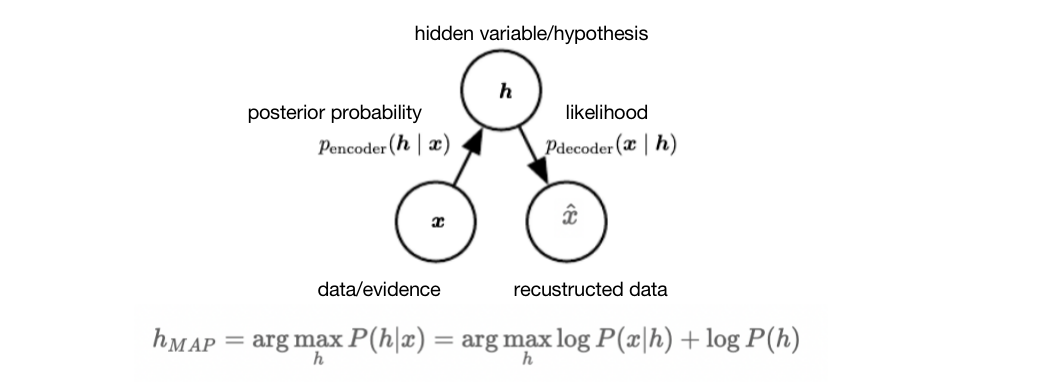

Given a probabilistic model, let:

- $h$ be hypothesis or hidden state we want to infer
- $x$ be observed data or evidence
- $P(h)$ be prior probability of hypothesis
- $P(x|h)$ be likelihood, which represents the probability of observing data given hypothesis
- $P(h|x)$ be posterior probability of hypothesis given observed data

According to Bayes' theorem, posterior probability is given by:

$$
P(h|x) = \frac{P(x|h) P(h)}{P(x)}
$$

**Maximum-a-posteriori (MAP) inference** aim to find the hypothesis $h$ that maximizes the posterior probability, i.e., has the highest probability given the observed data $x$, taking both the likelihood and the prior probability into account.

$$
h_{MAP} = \arg\max_h P(h|x) = \arg\max_h \frac{P(x|h) P(h)}{P(x)}
$$

Since the denominator $P(x)$ does not depend on $h$, we can rewrite the MAP inference as:

$$
h_{MAP} = \arg\max_h P(x|h) P(h)=\arg\max_h \log P(x|h) + \log P(h)
$$

**regularization term can be viewed as a prior $\log P(h)$ add to log likelihood estimate $\log P(x|h)$**

$$
h_{MAP} = \arg\max_h P(h|x)=\arg\max_h \log P(x|h) + \log P(h)
$$

## Sparse Autoencoder

sparse autoencoder adds a sparsity penalty to loss function

e.g., L1 penalty $\Omega(z)=\lambda |z|$ and ReLU activation prior to code layer

in MAP inference view, L1 penalty is $P(h)=\frac{\lambda}{2}\exp(-\lambda |h|)$

## Contractive Autoencoder

contractive autoencoder adds **contractive penalty** to loss function:

$$
\Omega(z)=\lambda ||\nabla_x f||_F^2
$$

- reconstruction error: penalize insensitivity to **reconstruction direction/data manifold direction**

- contractive penalty: penalize sensitivity to **any direction**

    regularize **encoder** by a squared Frobenius norm of Jacobian matrix of encoder function $f$ w.r.t $x$, which penalize large derivatives, encourage most singular values of Jacobian matrix < 1

- encourage Autoencoder to learn a robust feature that is locally insensitive to **infinitesimal** perturbations of input, i.e., noise/tangent vector

- gets name from locally **contracts**/maps a neighborhood of input points to a smaller neighborhood of output points

relation to denosing AE:

- for small Gaussian noise, reconstruction error of denosing AE = contractive penalty on $g(f(\tilde x))$, 


### relation to Manifold learning

- Manifold learning is an unsupervised learning approach that aims to discover the lower-dimensional structure or manifold embedded in higher-dimensional data. 

- A tangent vector: a vector that is tangential to a manifold at a specific point.

    In contractive AE, tangent vectors represent the local variations or directions of change within the manifold.

- tangent directions are Directions with the largest singular values of Jacobian matrix

- Tangent hyperplane: plane indicating local directions of variation allowed on the manifold

- contractive AE is a type of Manifold learning, learn a continuous and smooth representation of the data manifold in the latent space. 

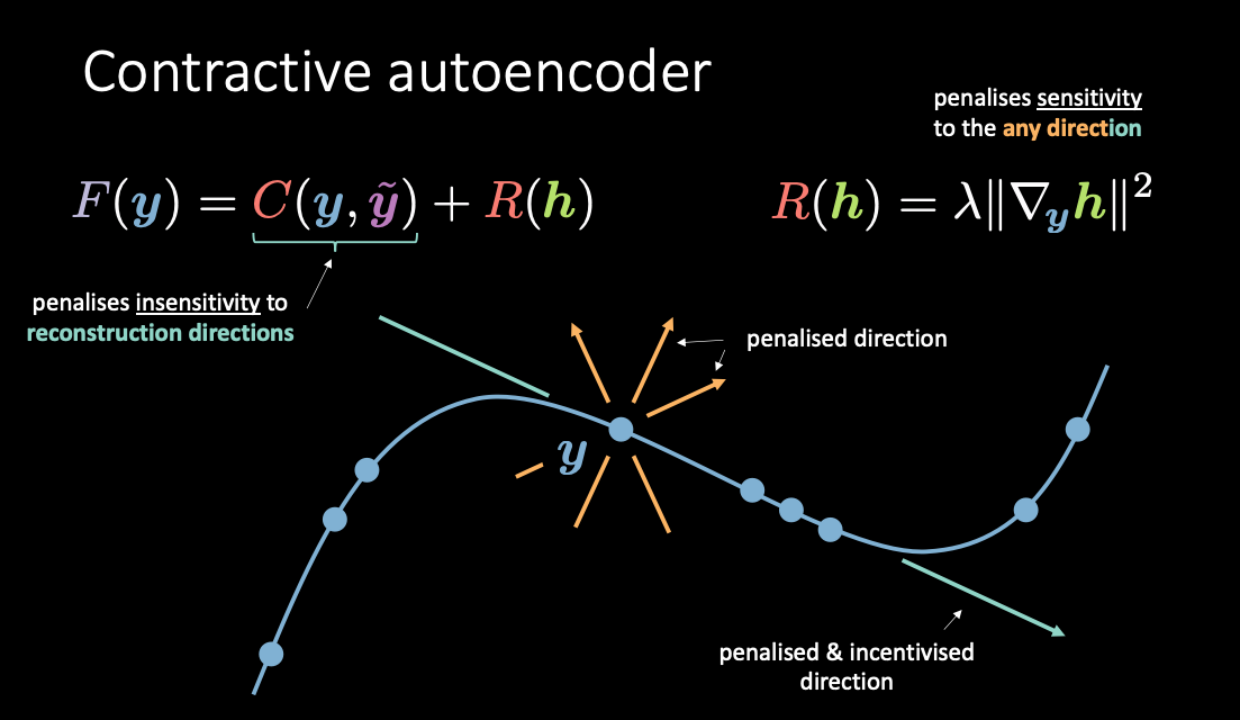

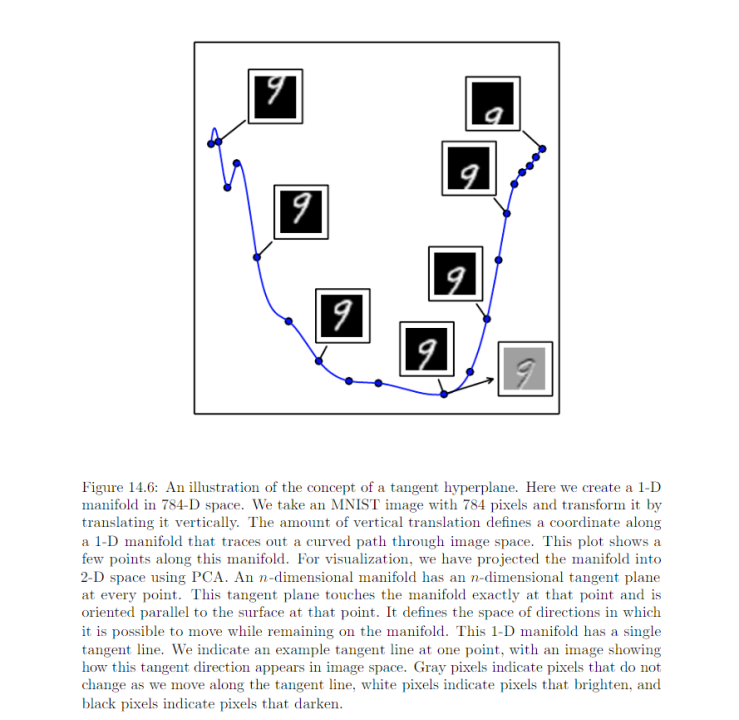

### problem

Issues of Contractive Autoencoder (CAE) and possible solutions:

1. Computational complexity:

   - Issue: computation of Jacobian matrix is expensive for large and deep networks.
   
   - Solution: Separately train a series of single-layer autoencoders to
reconstruct the previous autoencoder’s hidden layer. Compose these together to form a deep AE

2. ineffective contractive penalty

   - issue: encoder multiply by a and decoder divide by a, Driving a to zeros atisfies the contractive penalty

   - solution: tie weight matrix of encoder and decoder together. e.g., weight matrix of decoder is transpose of encoder.

# denoising Autoencoder

- denoising AE learns a reconstruction distribution $p(x| \tilde x)$ from training pairs $(x, \tilde x)$

- denoising Autoencoder minimize reconstruction loss of input and reconstructed **noisy** input

$$
L[x, g(f( {\color{red}{\tilde x}} ))]
$$

where $\tilde x$ is a noisy/corrupted version of $x$, denoising AE learn to **undo the corruption** 

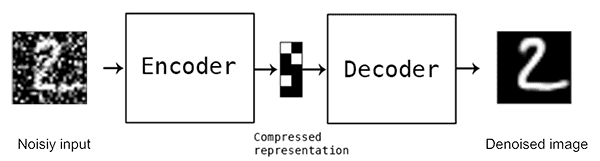

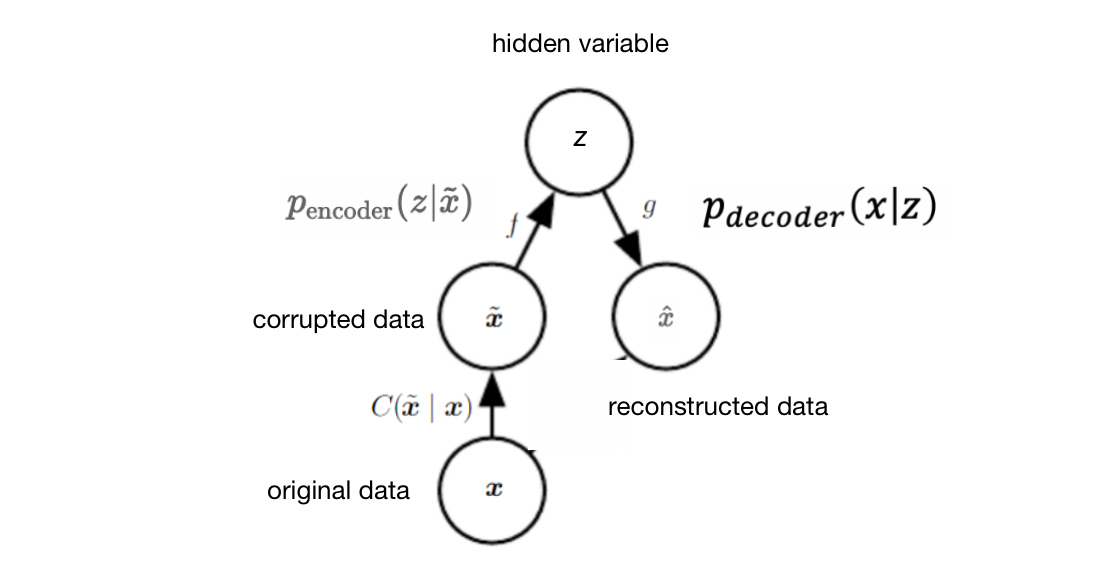

**Algorithm**

1. training data: original data $x \sim p_{\text{Data}}(x)$, corrupted data $\tilde x \sim C(\tilde x|x)$

2. encode: $z = f(\tilde x)$. posterior probability $p_{\text{encoder}}(z|\tilde x)$

3. decode: $\hat x = g(z)$. likelihood $p_{\text{Decoder}}(x|z)$.

4. compute loss: because $p_{\text{Reconstruct}}(x|\tilde x)=p_{\text{Decoder}}(x|z)$

    reconstruction loss $||x-g(f(\tilde x))||^2$ equivalent to negative log-likelihood $-\log p_{\text{Decoder}}(x|z)$

5. SGD on negative log-likelihood

## denoising and Manifold learning

- if we add some corruption to data on the Manifold,

    the corrupted data will be away from Manifold, 

    denoising AE can learn to push back corrupted data to Manifold


- black curve: data manifold


- red cross: true signal $x$


- gray circle: equiprobable corruption 等可能发生的数据损坏


- green arrow: denoising AE learn what kind of noise is **orthogonal** to manifold of data

    correction back the corrupted data $\tilde x$ back to the **nearest point** $g(f(\tilde x))$ on the manifold (reconstructed data)

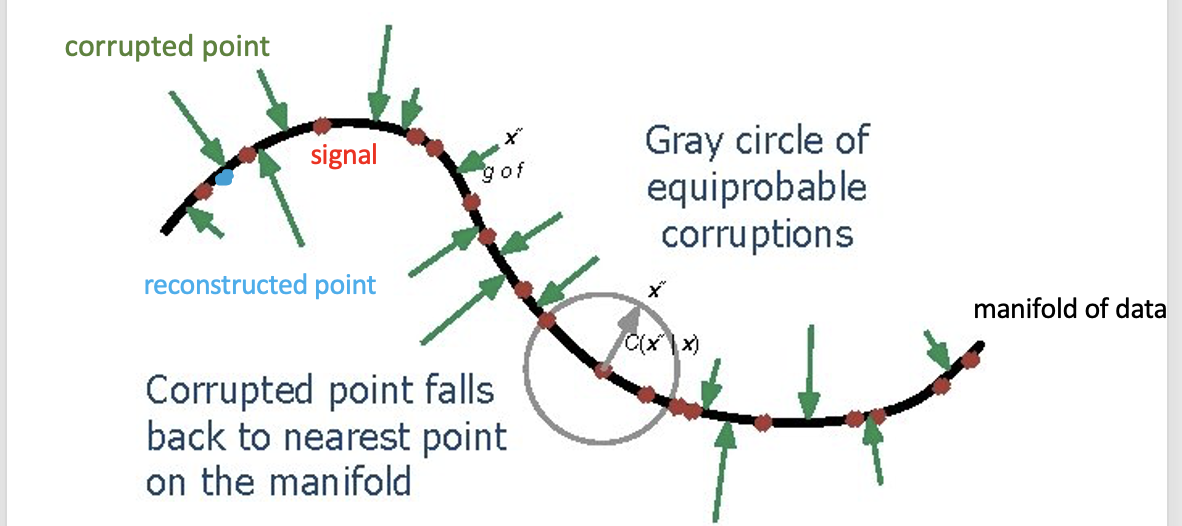

# can Autoencoder be a generative model?

- can we use an Autoencoder as a generative model?

    yes, use **decoder** part of an Autoencoder
    

- architecture of Autoencoder

    - training process: input (a high dim vector) > encoder > encoded vector (in latent space) > decoder > reconstructed input (output without noise or with some augmentation)
    
    - **generation process**: **sampler** (throw away encoder, sample from latent space) > sampled vector (from latent space, similar to encoded vector) > decoder > generated content

- problem: latent space is too sparse

    latent space of Autoencoder is only optimized for reconstruction rather than generation,

    it can only reconstruct samples in training data

    there is gap between any data point in the latent space, can't interpolate data point in gap.

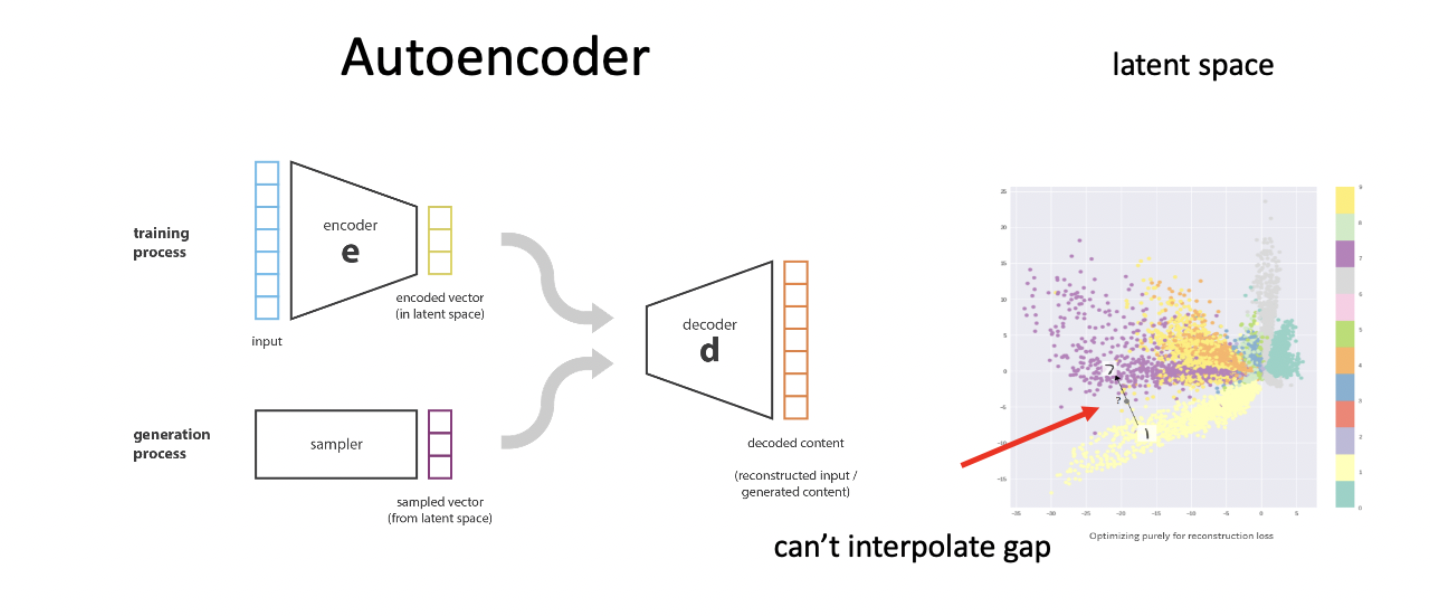

## generative denoising Autoencoder

The Generalized Denoising Autoencoder (GDAE) proposed by Bengio et al. (2013) extends the traditional denoising autoencoder (DAE) to serve as a generative model. The key idea is to use the Markov Chain Monte Carlo (MCMC) method, specifically Gibbs sampling, to sample from the model's distribution. The algorithm is as follows:

1. Initialize $x^{(0)}$ with a random sample from the data distribution or any other initial value.

2. For each iteration t:

   a. Generate a corrupted version of the current sample $x^{(t)}$, obtaining $\tilde{x}^{(t)} \sim C(\tilde{x}|x^{(t)})$, where $C$ is the corruption process.

   b. Generate a reconstruction of the corrupted sample, obtaining $x^{(t+1)} \sim R(x|\tilde{x}^{(t)})$, where $R$ is the learned reconstruction distribution of the denoising autoencoder.
   
3. Repeat steps 2a and 2b for a desired number of iterations to get samples from the GDAE's generative model.

In this algorithm, the GDAE alternates between a corruption step and a reconstruction step, and over time, it converges to samples from joint distribution.

learning a conditional distribution $P(X|\tilde X)$ is a lot simpler than learning the joint distribution, can just be a Gaussian or something simple

This idea is used in style transfer and other places

problem

- slow generation

- Mixing between modes: generate samples from a limited subset of the data distribution.

- Lack of explicit control over latent variables:
